In [1]:
import re
import emoji
import pandas as pd
from wordcloud import WordCloud
from urlextract import URLExtract
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
f = open('TAI_chat_data.txt', mode = 'r', encoding = 'utf-8')
data = f.read()

In [3]:
print(data)

1/6/22, 18:21 - Akhila Tai created group "Tai DEV & TESTING Team"
1/6/22, 18:21 - You were added
9/14/22, 11:00 - +91 98739 93949: Looks good to me
9/14/22, 13:26 - Akhila Tai: Hi team
9/14/22, 13:27 - Akhila Tai: need urgently the feature pipeline matrix we had in terms of what we have and what is not present for each pipeline

need  it asap to complete the roadmap document to be sent to adam... Do we have this document already? If yes can anyone share it with me via email? If it's not present then can anyone work on this  and send ASAP??
9/19/22, 09:43 - Akhila Tai: Hi everyone today's stand up call is postponed to evening 5:30-6 ... I'll keep you posted if any further changes.... Plz continue working fast towards structured and image pipeline....
9/19/22, 09:44 - Akhila Tai: meghana plz assign someone to take care of image pipeline in absence of u ( tomorrow nd day after tomorrow)
9/19/22, 09:48 - +91 6281 346 496: Sure Akhila
9/19/22, 09:50 - Akhila Tai: Shiva and meghana dress cod

Spliting data (date and message)

In [4]:
# extrating message from text

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
msg = re.split(pattern, data)[1:]
len(msg)

674

In [5]:
# extrating dates from text

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}'
dates = re.findall(pattern, data)
len(dates)

674

In [6]:
# creating dataframe

df = pd.DataFrame({'date' : dates ,'user_message':msg})

# converting datetime formate
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)



In [7]:
df.sample(5)

,date,user_message
630,2023-03-08 11:40:00,+91 83285 27025: Yesterday shared the ui resul...
6,2022-09-19 09:44:00,Akhila Tai: meghana plz assign someone to take...
537,2023-01-13 12:58:00,Akhila Tai: Hi Sumanya.. Work with shiva on pr...
501,2023-01-06 16:06:00,Akhila Tai added +91 95501 99707\n
201,2022-11-09 11:21:00,Akhila Tai: Plz call me back\n


In [8]:
df.shape

(674, 2)

In [9]:
# spliting user name and message

user = []
message = []

for msg in df['user_message']:
    result = re.split('([\w\W]+?):\s', msg)
    if result[1:]:
        user.append(result[1])
        message.append(result[2])
    else:
        user.append('group_notification')
        message.append(result[0])

df['user'] = user
df['message'] = message
df.drop(['user_message'],axis = 1, inplace=True)
    

In [10]:
df.head()

,date,user,message
0,2022-01-06 18:21:00,group_notification,"Akhila Tai created group ""Tai DEV & TESTING Te..."
1,2022-01-06 18:21:00,group_notification,You were added\n
2,2022-09-14 11:00:00,+91 98739 93949,Looks good to me\n
3,2022-09-14 13:26:00,Akhila Tai,Hi team\n
4,2022-09-14 13:27:00,Akhila Tai,need urgently the feature pipeline matrix we h...


In [11]:
# https://github.com/campusx-official/whatsapp-chat-analysis/blob/main/preprocessor.py

In [12]:
# creating seperate columns for dates 

df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [13]:
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2022-01-06 18:21:00,group_notification,"Akhila Tai created group ""Tai DEV & TESTING Te...",2022-01-06,2022,1,January,6,Thursday,18,21
1,2022-01-06 18:21:00,group_notification,You were added\n,2022-01-06,2022,1,January,6,Thursday,18,21
2,2022-09-14 11:00:00,+91 98739 93949,Looks good to me\n,2022-09-14,2022,9,September,14,Wednesday,11,0
3,2022-09-14 13:26:00,Akhila Tai,Hi team\n,2022-09-14,2022,9,September,14,Wednesday,13,26
4,2022-09-14 13:27:00,Akhila Tai,need urgently the feature pipeline matrix we h...,2022-09-14,2022,9,September,14,Wednesday,13,27


In [14]:
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2022-01-06 18:21:00,group_notification,"Akhila Tai created group ""Tai DEV & TESTING Te...",2022-01-06,2022,1,January,6,Thursday,18,21
1,2022-01-06 18:21:00,group_notification,You were added\n,2022-01-06,2022,1,January,6,Thursday,18,21
2,2022-09-14 11:00:00,+91 98739 93949,Looks good to me\n,2022-09-14,2022,9,September,14,Wednesday,11,0
3,2022-09-14 13:26:00,Akhila Tai,Hi team\n,2022-09-14,2022,9,September,14,Wednesday,13,26
4,2022-09-14 13:27:00,Akhila Tai,need urgently the feature pipeline matrix we h...,2022-09-14,2022,9,September,14,Wednesday,13,27


In [15]:
# claculating total number of words  

words = []
for msg in df['message']:
    words.extend(msg.split())

len(words)

6728

In [16]:
# calculating number of media messages

df[df['message'] == '<Media omitted>\n'].shape[0]


6

In [17]:
# claculating total number of links 

extract = URLExtract()

num_links = []
for msg in df['message']:
    words.extend(extract.find_urls(msg))

len(num_links)

0

In [18]:
df['user'].value_counts().head()

Akhila Tai             421
+91 83285 27025         60
+91 94082 68211         40
+91 78932 45664         31
Vachaspathi Sir TAI     27
Name: user, dtype: int64

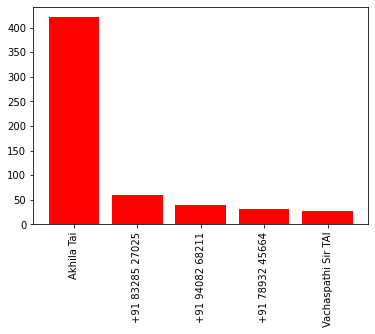

In [19]:
# calculating most busy users and plot Bar chart

xn = df['user'].value_counts().head()
name = xn.index
count = xn.values
plt.bar(name, count, color = 'red')
plt.xticks(rotation = 'vertical')
plt.show()

In [20]:
# claculating message  percentage in group

df1 = round((df['user'].value_counts()/ df.shape[0])*100, 2).reset_index().rename(columns = {'index':'user', 'user': 'percentage'})

In [21]:
type(df1)

pandas.core.frame.DataFrame

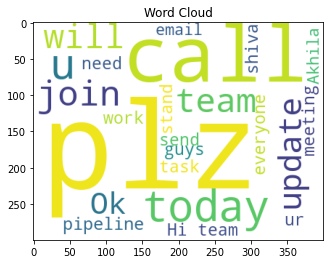

In [22]:
# word cloud

wc = WordCloud(width=400, height=300, min_font_size=16, background_color='white')
df_wc = wc.generate(df['message'].str.cat(sep = " "))
plt.title('Word Cloud')
plt.imshow(df_wc)


TypeError: object of type 'WordCloud' has no len()

In [23]:
# removing group notifications and media omitted

temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [24]:
f = open('stop_hinglish.txt', mode = 'r', encoding = 'utf-8')
stop_words = f.read()
len(stop_words)

6009

In [25]:
# removing stop words from data 
words = []
for msg in temp['message']:
    for word in msg.lower().split():
        if word not in stop_words:
            words.append(word)

words


['team',
 'urgently',
 'feature',
 'pipeline',
 'matrix',
 'terms',
 'present',
 'pipeline',
 'asap',
 'complete',
 'roadmap',
 'document',
 'adam...',
 'document',
 'already?',
 'share',
 'email?',
 'present',
 'work',
 'send',
 'asap??',
 "today's",
 'stand',
 'call',
 'postponed',
 'evening',
 '5:30-6',
 'posted',
 'changes....',
 'plz',
 'continue',
 'working',
 'fast',
 'structured',
 'image',
 'pipeline....',
 'meghana',
 'plz',
 'assign',
 'care',
 'image',
 'pipeline',
 'absence',
 '(',
 'tomorrow',
 'day',
 'tomorrow)',
 'akhila',
 'standup',
 'call',
 'sorry',
 'busy',
 'infosys',
 'work',
 'pipeline',
 'owners',
 'plz',
 'update',
 '"',
 'grid',
 'flow',
 'pipeline',
 '"',
 'excel',
 'sheet',
 'latest',
 'information',
 'confirm',
 'asap',
 'edited',
 'pipeline',
 'information',
 'https://docs.google.com/spreadsheets/d/1utxpjra56-jlpqcngkv8otnvhhoxkwquxgqqgwfyiwy/edit?usp=drivesdk',
 'access',
 'pipeline',
 'owners',
 'access',
 'check',
 'moment',
 'vachaspati',
 'plz',
 'c

In [26]:
# most common used words 

most_common_words = pd.DataFrame(Counter(words).most_common(20))
most_common_words

,0,1
0,plz,114
1,call,103
2,team,68
3,today,63
4,join,52
5,meeting,50
6,pipeline,45
7,update,38
8,stand,33
9,send,32


In [27]:
# dealing with Emoji's
import emoji

emojis = []
for msg in df['message']:
    emojis.extend([i for i in msg if emoji.distinct_emoji_list(i)])
len(emojis)

22

In [28]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
emoji_df

,0,1
0,👆,10
1,👍,7
2,🏻,3
3,🔴,1
4,🙏,1


c:\Users\sumit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\sumit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\sumit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\sumit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\sumit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\sumit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128070 missing 

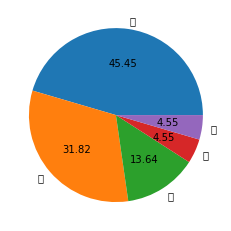

In [29]:
fig, ax = plt.subplots()
ax.pie(emoji_df[1].head(), labels=emoji_df[0].head(), autopct="%0.2f")
plt.show()
            

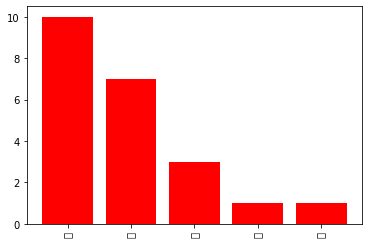

In [30]:
# calculating most busy users and plot Bar chart

plt.bar(emoji_df[0], emoji_df[1], color = 'red')
plt.xticks(rotation = 'vertical')
plt.show()

In [31]:
# apply groupby on year and month

monthly_time_line = df.groupby(['year', 'month']).count()['message'].reset_index()
monthly_time_line

,year,month,message
0,2022,December,154
1,2022,January,2
2,2022,November,161
3,2022,October,83
4,2022,September,74
5,2023,April,18
6,2023,February,26
7,2023,January,104
8,2023,March,52


In [32]:
# merging month and year columns

time = []
for i in range(monthly_time_line.shape[0]):
    time.append(monthly_time_line['month'][i] + '-' + str(monthly_time_line['year'][i]))
monthly_time_line['time'] = time

In [33]:
monthly_time_line

,year,month,message,time
0,2022,December,154,December-2022
1,2022,January,2,January-2022
2,2022,November,161,November-2022
3,2022,October,83,October-2022
4,2022,September,74,September-2022
5,2023,April,18,April-2023
6,2023,February,26,February-2023
7,2023,January,104,January-2023
8,2023,March,52,March-2023


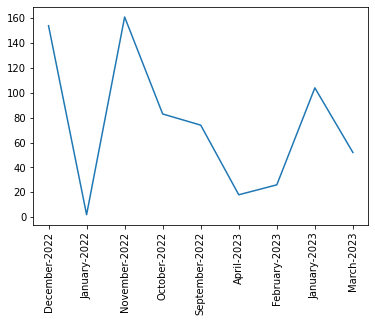

In [34]:
plt.plot(monthly_time_line['time'], monthly_time_line['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [35]:
monthly_time_line[['time', 'message']]

,time,message
0,December-2022,154
1,January-2022,2
2,November-2022,161
3,October-2022,83
4,September-2022,74
5,April-2023,18
6,February-2023,26
7,January-2023,104
8,March-2023,52


In [36]:
daily_time_line = df.groupby(['only_date']).count()['message'].reset_index()
daily_time_line

,only_date,message
0,2022-01-06,2
1,2022-09-14,3
2,2022-09-19,6
3,2022-09-22,29
4,2022-09-23,4
...,...,...
108,2023-04-07,1
109,2023-04-13,1
110,2023-04-14,1
111,2023-04-17,2


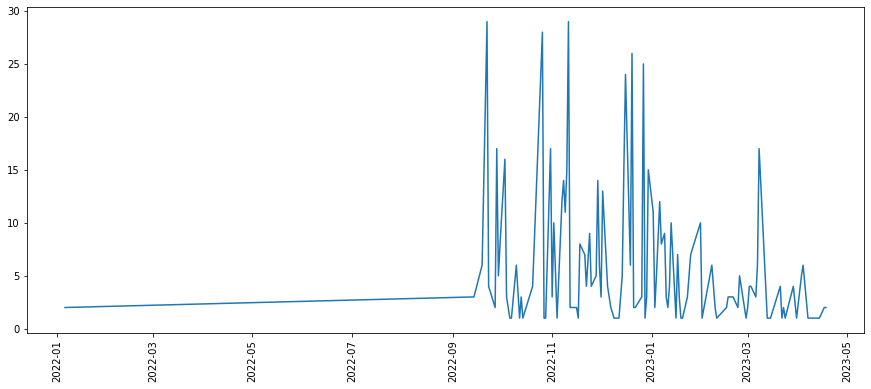

In [37]:
plt.figure(figsize = (15,6))
plt.plot(daily_time_line['only_date'], daily_time_line['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [38]:
# mostly members are active on friday

df['day_name'].value_counts()

Friday       150
Tuesday      149
Wednesday    131
Monday       123
Thursday     111
Saturday      10
Name: day_name, dtype: int64

In [39]:
# mostly members are active on friday

df['month'].value_counts()

November     161
December     154
January      106
October       83
September     74
March         52
February      26
April         18
Name: month, dtype: int64

In [46]:
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

In [48]:
df['period'] = period

In [49]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
0,2022-01-06 18:21:00,group_notification,"Akhila Tai created group ""Tai DEV & TESTING Te...",2022-01-06,2022,1,January,6,Thursday,18,21,18-19
1,2022-01-06 18:21:00,group_notification,You were added\n,2022-01-06,2022,1,January,6,Thursday,18,21,18-19
2,2022-09-14 11:00:00,+91 98739 93949,Looks good to me\n,2022-09-14,2022,9,September,14,Wednesday,11,0,11-12
3,2022-09-14 13:26:00,Akhila Tai,Hi team\n,2022-09-14,2022,9,September,14,Wednesday,13,26,13-14
4,2022-09-14 13:27:00,Akhila Tai,need urgently the feature pipeline matrix we h...,2022-09-14,2022,9,September,14,Wednesday,13,27,13-14
...,...,...,...,...,...,...,...,...,...,...,...,...
669,2023-04-14 13:24:00,Akhila Tai,Hi Ashish Thomas plz call me\n,2023-04-14,2023,4,April,14,Friday,13,24,13-14
670,2023-04-17 11:32:00,Akhila Tai,Hi team i shall ping you individually to get u...,2023-04-17,2023,4,April,17,Monday,11,32,11-12
671,2023-04-17 11:33:00,Akhila Tai,If anyone has any questions plz feel free to p...,2023-04-17,2023,4,April,17,Monday,11,33,11-12
672,2023-04-18 10:34:00,Akhila Tai,Hi team for today’s stand up call make sure al...,2023-04-18,2023,4,April,18,Tuesday,10,34,10-11


In [57]:
activity_heatmap_df = df.pivot_table(index = 'day_name', columns = 'period', values = 'message', aggfunc='count').fillna(0)
activity_heatmap_df

period,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,
Friday,27.0,21.0,34.0,12.0,8.0,7.0,6.0,1.0,12.0,2.0,7.0,2.0,2.0,2.0,0.0,1.0,6.0
Monday,13.0,28.0,12.0,11.0,9.0,17.0,5.0,6.0,4.0,0.0,8.0,4.0,1.0,0.0,1.0,0.0,4.0
Saturday,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Thursday,17.0,46.0,20.0,4.0,6.0,1.0,1.0,7.0,3.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0
Tuesday,54.0,21.0,10.0,18.0,8.0,10.0,2.0,8.0,4.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,3.0
Wednesday,23.0,25.0,11.0,6.0,2.0,9.0,15.0,10.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


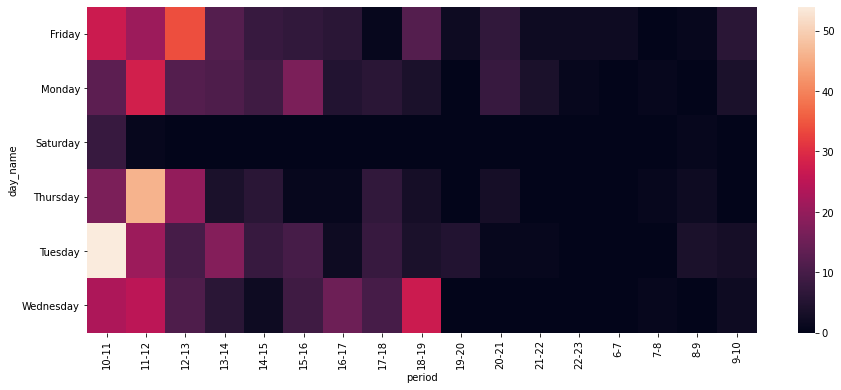

In [58]:
# creating a pivot table

plt.figure(figsize = (15,6))
sns.heatmap(activity_heatmap_df)

plt.xticks(rotation = 'vertical')
plt.yticks(rotation = 'horizontal')
plt.show()